In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [36]:
data=pd.read_csv('winequality-red.csv')  # read the data
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(1599, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   floa

In [38]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

print(data.shape)

(1359, 12)


In [39]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


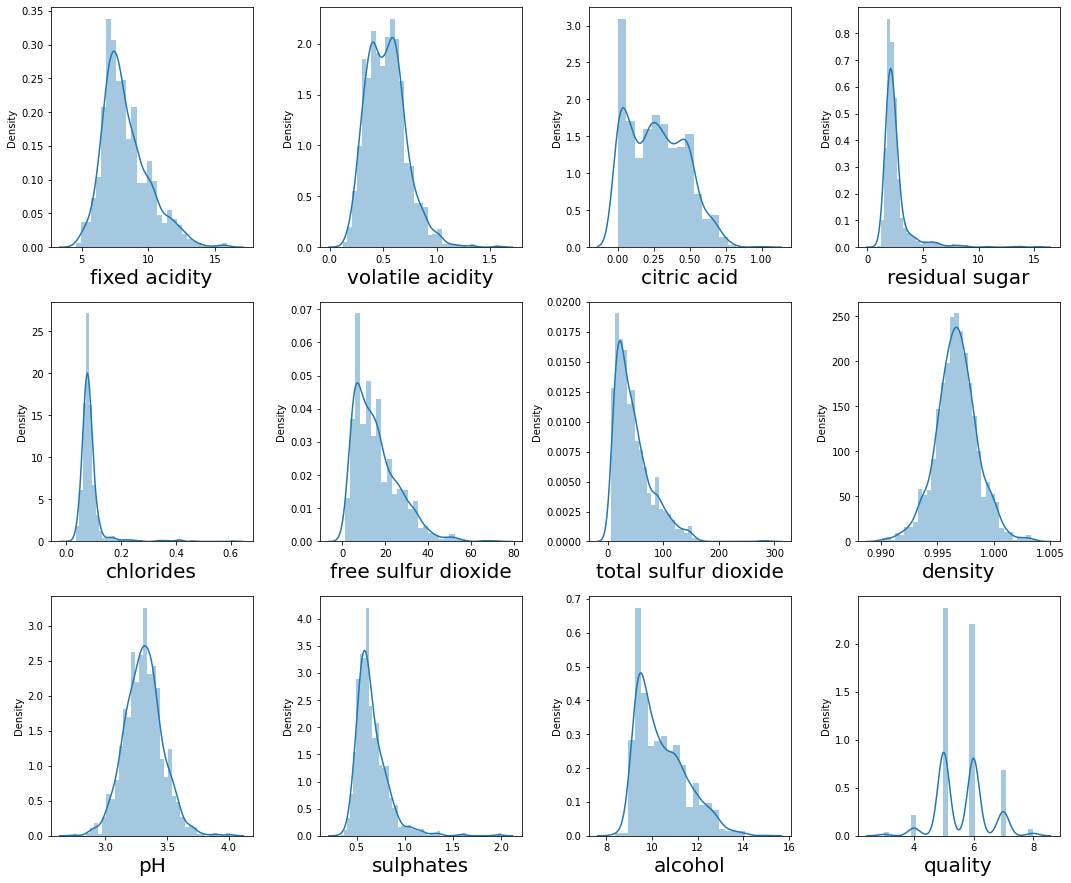

In [40]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Text(0, 0.5, 'alcohol')

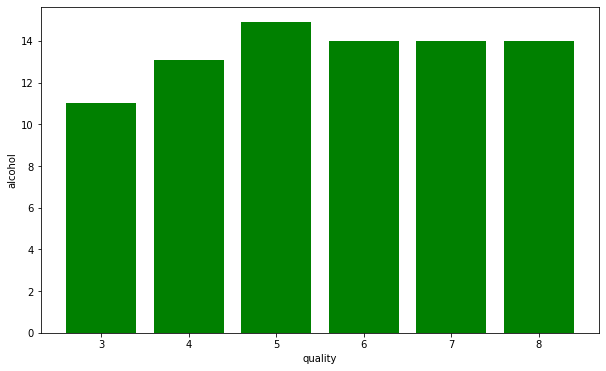

In [41]:
# lets plot the bar graph in which we check what value of alcohol can able to make changes in quality.
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='green')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

In [42]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

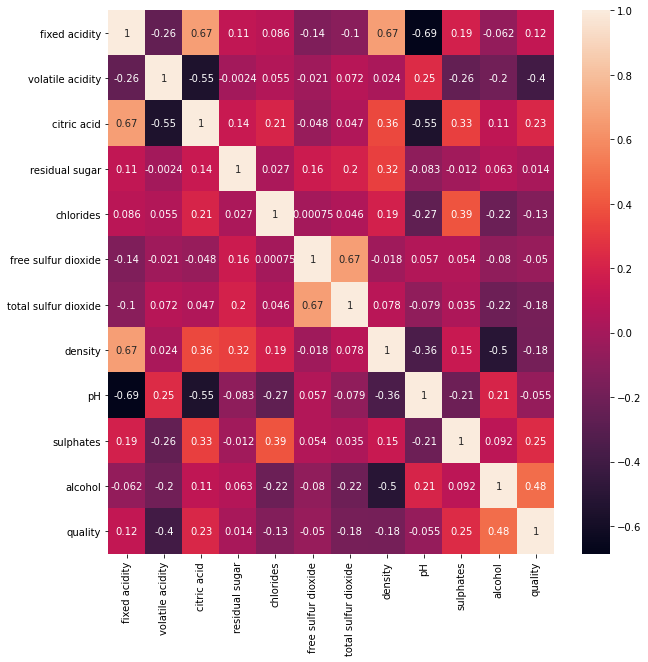

In [43]:
# lets check multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [44]:
data['best_quality']=[1 if x>=7 else 0 for x in data.quality]
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [45]:
# Let's Seperate the data 
x=data.drop(columns=['quality','best_quality'])
y=data['best_quality']

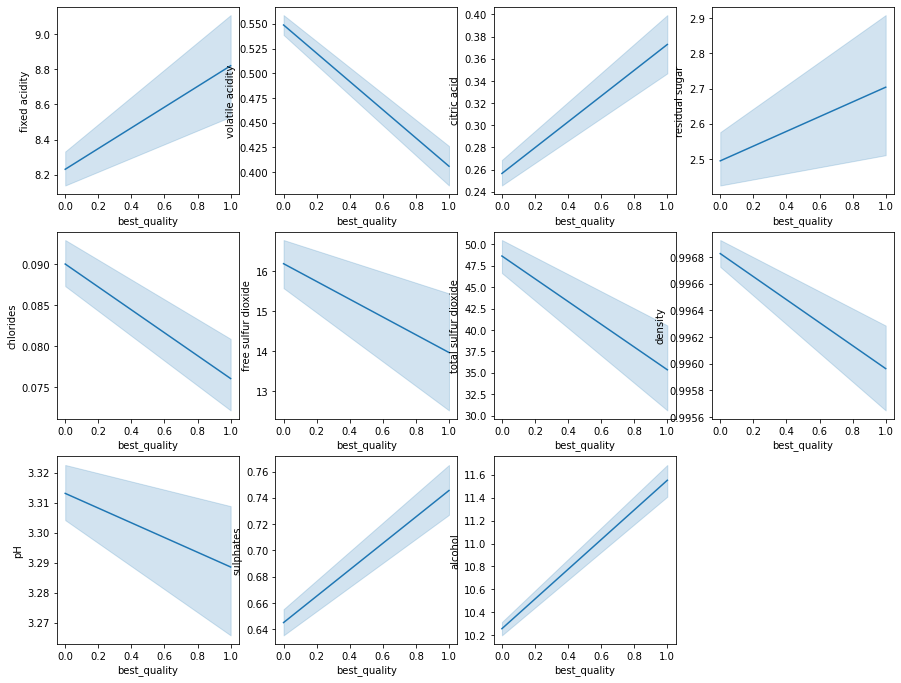

In [46]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

# model building using Selectpercentile method

In [59]:
from sklearn.feature_selection import SelectKBest,  f_classif



In [60]:
sk=SelectKBest(score_func=f_classif,k=10)
fit=sk.fit(x,y)

In [63]:
data_score=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

In [67]:
#concat the dataframe
features_score=pd.concat([data_columns,data_score],axis=1)
features_score.columns=['features_name','score']
print(features_score.nlargest(10,'score'))

           features_name       score
10               alcohol  274.086403
1       volatile acidity  104.454520
2            citric acid   58.660865
9              sulphates   57.459267
7                density   34.767118
6   total sulfur dioxide   25.525127
0          fixed acidity   18.547729
4              chlorides   12.837335
5    free sulfur dioxide    7.224343
8                     pH    3.987902


In [70]:
new_x=data[['alcohol','volatile acidity','citric acid','sulphates','density','total sulfur dioxide','fixed acidity','chlorides','free sulfur dioxide','pH']]
new_x


,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity,chlorides,free sulfur dioxide,pH
0,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0.076,11.0,3.51
1,9.8,0.880,0.00,0.68,0.99680,67.0,7.8,0.098,25.0,3.20
2,9.8,0.760,0.04,0.65,0.99700,54.0,7.8,0.092,15.0,3.26
3,9.8,0.280,0.56,0.58,0.99800,60.0,11.2,0.075,17.0,3.16
5,9.4,0.660,0.00,0.56,0.99780,40.0,7.4,0.075,13.0,3.51
...,...,...,...,...,...,...,...,...,...,...
1593,9.5,0.620,0.08,0.82,0.99651,38.0,6.8,0.068,28.0,3.42
1594,10.5,0.600,0.08,0.58,0.99490,44.0,6.2,0.090,32.0,3.45
1595,11.2,0.550,0.10,0.76,0.99512,51.0,5.9,0.062,39.0,3.52
1597,10.2,0.645,0.12,0.71,0.99547,44.0,5.9,0.075,32.0,3.57


In [71]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(new_x)

In [80]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=35)

# Build Model to predict Quality

In [81]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,))

In [82]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =30)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [83]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)

print_score(LR,x_train,x_test,y_train,y_test,train=True)
print_score(LR,x_train,x_test,y_train,y_test,train=False)
model_accuracy(LR)

Train Report: -0.054162525800779626
Test Report: 0.875
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.97      0.93       351
           1       0.62      0.26      0.37        57

    accuracy                           0.88       408
   macro avg       0.76      0.62      0.65       408
weighted avg       0.85      0.88      0.85       408

Confusion Matrix: [[342   9]
 [ 42  15]]
Accuracy: 87.31 %
Standard Deviation: 5.05 %


In [84]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train,y_train)

print_score(rand_clf,x_train,x_test,y_train,y_test,train=True)
print_score(rand_clf,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.8872549019607843
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.98      0.94       351
           1       0.74      0.30      0.42        57

    accuracy                           0.89       408
   macro avg       0.82      0.64      0.68       408
weighted avg       0.87      0.89      0.87       408

Confusion Matrix: [[345   6]
 [ 40  17]]
Accuracy: 87.82 %
Standard Deviation: 4.49 %


In [85]:
# Model no.3
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)
model_accuracy(svc)


Train Report: 0.07306398593379715
Test Report: 0.8872549019607843
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       351
           1       0.82      0.25      0.38        57

    accuracy                           0.89       408
   macro avg       0.86      0.62      0.66       408
weighted avg       0.88      0.89      0.86       408

Confusion Matrix: [[348   3]
 [ 43  14]]
Accuracy: 87.72 %
Standard Deviation: 3.60 %


In [86]:
#Model no.4
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.821078431372549
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.89      0.90       351
           1       0.37      0.39      0.38        57

    accuracy                           0.82       408
   macro avg       0.63      0.64      0.64       408
weighted avg       0.82      0.82      0.82       408

Confusion Matrix: [[313  38]
 [ 35  22]]
Accuracy: 83.18 %
Standard Deviation: 6.46 %


In [87]:
#Model no.5
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)
model_accuracy(knn)

Train Report: 0.18211528170629165
Test Report: 0.875
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       351
           1       0.58      0.37      0.45        57

    accuracy                           0.88       408
   macro avg       0.74      0.66      0.69       408
weighted avg       0.86      0.88      0.86       408

Confusion Matrix: [[336  15]
 [ 36  21]]
Accuracy: 87.07 %
Standard Deviation: 4.69 %


In [88]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'C':[0.001,2,3,4,0.1,10],'gamma':[0.25,0.1,0.3,0.4]}
grid=GridSearchCV(estimator=svc, param_grid=para,cv=10)
grid.fit(x_train,y_train)

print(grid.best_params_)

{'C': 2, 'gamma': 0.3}


In [89]:
svc=SVC(C=2,gamma=0.3)
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)
model_accuracy(svc)


Train Report: 0.5728824248910633
Test Report: 0.8897058823529411
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94       351
           1       0.77      0.30      0.43        57

    accuracy                           0.89       408
   macro avg       0.83      0.64      0.68       408
weighted avg       0.88      0.89      0.87       408

Confusion Matrix: [[346   5]
 [ 40  17]]
Accuracy: 88.03 %
Standard Deviation: 4.41 %


In [98]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[7,10,8],'ccp_alpha':[0.25,0.1,0.3,0.4],'max_depth':[2,4,6,7,8,9],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=rand_clf, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 20, 'n_estimators': 7, 'max_depth': 8, 'ccp_alpha': 0.25}

In [105]:
rand_clf= RandomForestClassifier(random_state=20, n_estimators=7, max_depth= 8, ccp_alpha= 0.25)
rand_clf.fit(x_train,y_train)

print_score(rand_clf,x_train,x_test,y_train,y_test,train=True)
print_score(rand_clf,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_clf)


Train Report: -0.154126213592233
Test Report: 0.8602941176470589
Classification Report:               precision    recall  f1-score   support

           0       0.86      1.00      0.92       351
           1       0.00      0.00      0.00        57

    accuracy                           0.86       408
   macro avg       0.43      0.50      0.46       408
weighted avg       0.74      0.86      0.80       408

Confusion Matrix: [[351   0]
 [ 57   0]]
Accuracy: 86.65 %
Standard Deviation: 1.27 %


# lets check ROC AUC curve for fitted model

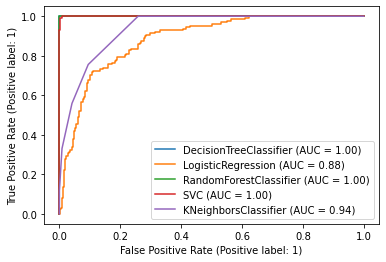

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(LR,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

# Lets check how our model works on test data

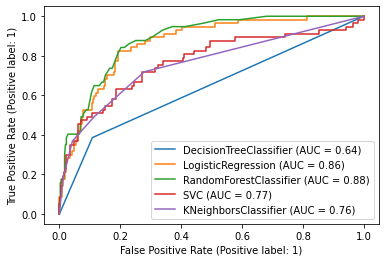

In [97]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

# Looking at ROC curve, accuracy score, confusion matrix & classification report with kfold cross validation the best model is Hyper tuning by using RandomizedSearchCV With RandomForestClassifier